<a href="https://colab.research.google.com/github/RenataRmz/mlops-repo/blob/main/Resultados_sobre_caracter%C3%ADsticas_de_las_localidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

In [2]:
# Crear carpeta de trabajo
os.makedirs("INEGI_Censo2020", exist_ok=True)
os.chdir("INEGI_Censo2020")

In [3]:
# ----------------------------
# 1. Descargar los archivos
# ----------------------------
!wget -O Censo_CL.zip "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/cl/Censo2020_CL_cdmx_csv.zip"
!wget -O Censo_CL_desc.xlsx "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/doc/Censo2020_CL_descriptor_bd.xlsx"

--2025-09-15 16:23:24--  https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/cl/Censo2020_CL_cdmx_csv.zip
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.23.8.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.23.8.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17042 (17K) [application/x-zip-compressed]
Saving to: ‘Censo_CL.zip’

Censo_CL.zip        100%[===================>]  16.64K  --.-KB/s    in 0.002s  

2025-09-15 16:23:25 (8.76 MB/s) - ‘Censo_CL.zip’ saved [17042/17042]

--2025-09-15 16:23:25--  https://www.inegi.org.mx/contenidos/programas/ccpv/2020/doc/Censo2020_CL_descriptor_bd.xlsx
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.23.8.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.23.8.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117283 (115K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Censo_CL_desc.xlsx’

Censo_CL_desc.xlsx  100%[===========

In [4]:
# ----------------------------
# 2. Descomprimir los ZIP
# ----------------------------
!unzip -o Censo_CL.zip -d Censo

Archive:  Censo_CL.zip
  inflating: Censo/TR_LOCALIDAD_09.csv  


In [5]:
# ----------------------------
# 3. Cargar CSVs y Excel
# ----------------------------
# 3.1 Cargar archivo de personas (buscar el CSV dentro de la carpeta)
localidades_files = os.listdir("Censo")
localidades_path = os.path.join("Censo", localidades_files[0])
df_localidades = pd.read_csv(localidades_path, encoding="latin1")
df_localidades.head()

,ENT,MUN,LOC,TIPOLOC,OTROTIPO_C,DIS_TRANS,AUTO,MICRO,CAMION,TAXI,...,USOIGL,USOFEST,USOCOMP,USOFAM,USOHOG,PROBLEMA,PROBLEMA_O_C,POBTOT,TAMLOC,LOC_LENGUA40PC
0,9,4,10,2,NaN,3,NaN,NaN,NaN,NaN,...,9.0,9.0,9.0,9.0,9.0,8,NaN,728,4,3
1,9,4,50,4,NaN,1,1.0,3.0,6.0,7.0,...,9.0,9.0,9.0,9.0,9.0,6,NaN,486,3,3
2,9,4,54,2,NaN,1,1.0,3.0,6.0,7.0,...,9.0,9.0,9.0,9.0,9.0,8,NaN,1233,5,3
3,9,4,55,2,NaN,1,2.0,3.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,6,NaN,80,1,3
4,9,4,56,7,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6,NaN,108,2,3


In [6]:
df_localidades.shape

(601, 162)

In [14]:
df_localidades.isnull().sum().sort_values()

,0
ENT,0
MUN,0
LOC,0
TIPOLOC,0
DIS_TRANS,0
...,...
OTROTIPO_C,599
OACT_PRIN_C,599
BARCOCAB,600
ACTART_CF,600


<Axes: ylabel='Frequency'>

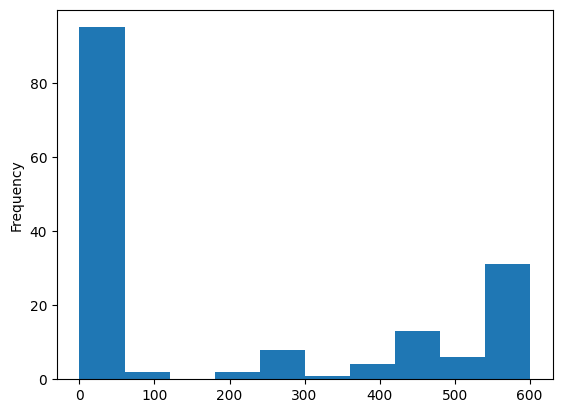

In [19]:
df_localidades.isnull().sum().sort_values().plot(kind = 'hist')